In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
from pandas import Series, DataFrame
sns.set(color_codes=True)
%matplotlib inline
%run plot_learning_curve

COLUMNS = ['Sex','Age','BMI','TimeNormal','TimeFast','Adrenaline','Office','Floor','Path','Lenght']
df = pd.read_csv('output_men_magnitud1.csv', sep=",", names=COLUMNS, skipinitialspace=True)
df_original = df.copy()
df


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


,Sex,Age,BMI,TimeNormal,TimeFast,Adrenaline,Office,Floor,Path,Lenght
0,Male,0,33.36,39.863943,38.161321,UP,9,0,9 29 34 37 39 44,36.0
1,Male,2,26.54,59.840652,48.050711,UP,26,2,26 27 52 57 62 64,46.0
2,Male,2,26.62,42.551919,40.829469,NONE,0,0,0 20 33 37 39 44,35.0
3,Male,0,99.99,168.064150,161.946408,UP,1,1,1 3 11 16 19 22 24 29,140.0
4,Male,1,24.39,167.642138,158.271625,DOWN,0,1,0 3 11 16 19 22 24 29,140.0
5,Male,2,23.30,53.574311,50.033915,UP,15,0,15 14 31 34 37 39 44,44.0
6,Male,1,27.45,45.973874,38.205637,DOWN,34,2,34 53 57 62 64,32.0
7,Male,2,23.30,48.924030,53.722433,DOWN,10,0,10 8 28 34 37 39 44,43.0
8,Male,2,25.82,46.333896,42.874795,DOWN,18,0,18 32 35 36 39 44,38.0
9,Male,2,39.31,55.363214,52.508569,DOWN,10,0,10 8 28 34 37 39 44,43.0


In [46]:
df.isnull().sum()

Sex           0
Age           0
BMI           0
TimeNormal    0
TimeFast      0
Adrenaline    0
Office        0
Floor         0
Path          0
Lenght        0
dtype: int64

In [43]:
df.loc[df.Floor == 0, 'Floor'] = "First"
df.loc[df.Floor == 1, 'Floor'] = "Second"
df.loc[df.Floor == 2, 'Floor'] = "Ground"

In [2]:
df_BMI = df[df.BMI < 90]
df = df_BMI
df.sum()

Sex           MaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMaleMa...
Age                                                        2079
BMI                                                     58084.4
TimeNormal                                               182573
TimeFast                                                 162782
Adrenaline    UPUPNONEDOWNUPDOWNDOWNDOWNDOWNDOWNDOWNNONEDOWN...
Office                                                    23421
Floor                                                      2041
Path          9 29 34 37 39 4426 27 52 57 62 640 20 33 37 39...
Lenght                                                   144351
dtype: object

In [3]:
df['Survive'] = 0
df['Survive'] = df['Survive'].astype(np.int64)
df.dtypes

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Sex            object
Age             int64
BMI           float64
TimeNormal    float64
TimeFast      float64
Adrenaline     object
Office          int64
Floor           int64
Path           object
Lenght        float64
Survive         int64
dtype: object

In [32]:
df.loc[(df["TimeNormal"] <= 40), "Survive"] = 1

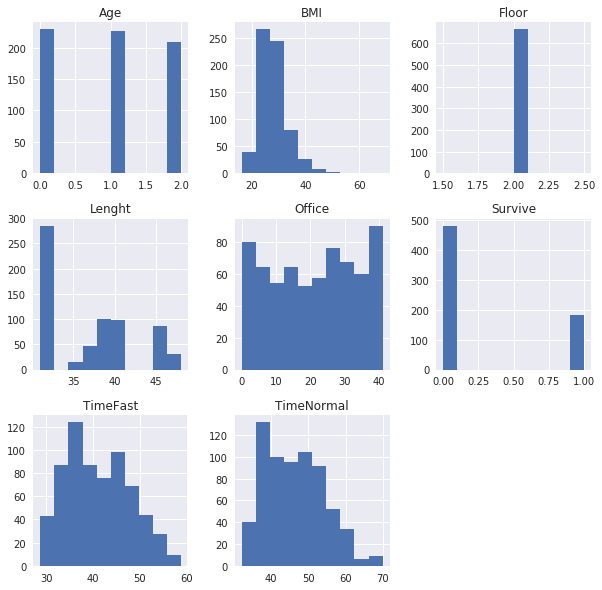

In [117]:
df_floorG.hist(figsize=(10,10))
plt.show()

In [121]:
df_floorG[df_floorG.Survive == 1 ].count()

Sex           183
Age           183
BMI           183
TimeNormal    183
TimeFast      183
Adrenaline    183
Office        183
Floor         183
Path          183
Lenght        183
Survive       183
dtype: int64

In [48]:
df_Age60 = df[df.Age == 0].count()
print df_Age60
df_Age6070 = df[df.Age == 1].count()
print df_Age6070
df_Age70 = df[df.Age == 2].count()
print df_Age70

Sex           699
Age           699
BMI           699
TimeNormal    699
TimeFast      699
Adrenaline    699
Office        699
Floor         699
Path          699
Lenght        699
dtype: int64
Sex           669
Age           669
BMI           669
TimeNormal    669
TimeFast      669
Adrenaline    669
Office        669
Floor         669
Path          669
Lenght        669
dtype: int64
Sex           705
Age           705
BMI           705
TimeNormal    705
TimeFast      705
Adrenaline    705
Office        705
Floor         705
Path          705
Lenght        705
dtype: int64


In [33]:
df_floorF = df[df.Floor == 0]
df_floorS = df[df.Floor == 1]
df_floorG = df[df.Floor == 2]

print df_floorG.corr()

                 Age       BMI  TimeNormal  TimeFast    Office  Floor  \
Age         1.000000  0.052461    0.151113  0.109670  0.015331    NaN   
BMI         0.052461  1.000000    0.110433  0.102348 -0.014350    NaN   
TimeNormal  0.151113  0.110433    1.000000  0.832263  0.008609    NaN   
TimeFast    0.109670  0.102348    0.832263  1.000000  0.010746    NaN   
Office      0.015331 -0.014350    0.008609  0.010746  1.000000    NaN   
Floor            NaN       NaN         NaN       NaN       NaN    NaN   
Lenght     -0.010922 -0.047057    0.892724  0.885550  0.016125    NaN   
Survive    -0.099796 -0.113007   -0.764452 -0.650068  0.026671    NaN   

              Lenght   Survive  
Age        -0.010922 -0.099796  
BMI        -0.047057 -0.113007  
TimeNormal  0.892724 -0.764452  
TimeFast    0.885550 -0.650068  
Office      0.016125  0.026671  
Floor            NaN       NaN  
Lenght      1.000000 -0.699339  
Survive    -0.699339  1.000000  


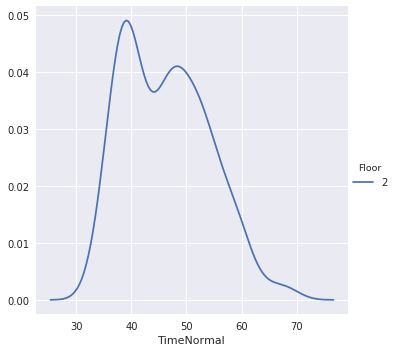

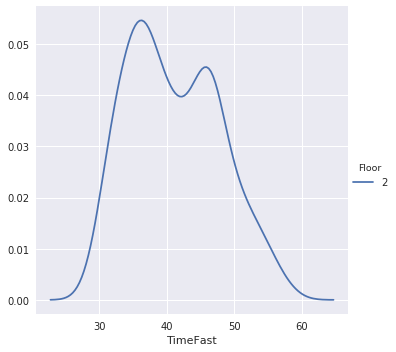

In [123]:
sns.FacetGrid(df_floorG, hue="Floor", size=5).map(sns.kdeplot, "TimeNormal").add_legend()
sns.FacetGrid(df_floorG, hue="Floor", size=5).map(sns.kdeplot, "TimeFast").add_legend()

In [71]:
df

,Sex,Age,BMI,TimeNormal,TimeFast,Adrenaline,Office,Floor,Path,Lenght,Survive
0,Male,0,33.36,39.863943,38.161321,UP,9,0,9 29 34 37 39 44,36.0,1
1,Male,2,26.54,59.840652,48.050711,UP,26,2,26 27 52 57 62 64,46.0,0
2,Male,2,26.62,42.551919,40.829469,NONE,0,0,0 20 33 37 39 44,35.0,0
4,Male,1,24.39,167.642138,158.271625,DOWN,0,1,0 3 11 16 19 22 24 29,140.0,0
5,Male,2,23.30,53.574311,50.033915,UP,15,0,15 14 31 34 37 39 44,44.0,0
6,Male,1,27.45,45.973874,38.205637,DOWN,34,2,34 53 57 62 64,32.0,0
7,Male,2,23.30,48.924030,53.722433,DOWN,10,0,10 8 28 34 37 39 44,43.0,0
8,Male,2,25.82,46.333896,42.874795,DOWN,18,0,18 32 35 36 39 44,38.0,0
9,Male,2,39.31,55.363214,52.508569,DOWN,10,0,10 8 28 34 37 39 44,43.0,0
10,Male,0,48.85,51.679328,44.021969,DOWN,8,0,8 28 34 37 39 44,36.0,0


In [29]:
df["TimeNormal"] = df["TimeNormal"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["TimeFast"] = df["TimeFast"].astype(int)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [26]:
features = ["BMI","Office","Lenght","TimeNormal","Floor"]
x = df[features].values
y = df['Survive'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
y_train


array([0, 1, 0, ..., 0, 0, 0])

In [34]:
#df_floorG.loc[(df_floorG["BMI"] > 35) & (df_floorG["BMI"] <=40), "BMI"] = 40
#df_floorG.loc[(df_floorG["BMI"] > 40), "BMI"] = 45
df_floorG

,Sex,Age,BMI,TimeNormal,TimeFast,Adrenaline,Office,Floor,Path,Lenght,Survive
1,Male,2,26,59,48,UP,26,2,26 27 52 57 62 64,46.0,0
6,Male,1,27,45,38,DOWN,34,2,34 53 57 62 64,32.0,0
15,Male,1,30,40,35,DOWN,21,2,21 51 56 58 64,31.0,1
16,Male,1,29,45,41,NONE,13,2,13 14 48 56 58 64,39.0,0
17,Male,1,17,35,30,NONE,14,2,14 48 56 58 64,31.0,1
18,Male,0,27,40,33,NONE,34,2,34 53 57 62 64,32.0,1
22,Male,1,23,48,42,UP,38,2,38 39 55 57 62 64,39.0,0
23,Male,1,28,49,43,UP,29,2,29 32 53 57 62 64,40.0,0
26,Male,1,30,52,45,NONE,30,2,30 27 52 57 62 64,45.0,0
39,Male,0,30,35,33,DOWN,22,2,22 51 56 58 64,31.0,1


In [10]:
#from pandas import DataFrame, Series
#from sklearn.linear_model import LinearRegression
#import scipy, scipy.stats
#import statsmodels.formula.api as sm

#df_floorG['Eins'] = np.ones(( len(df_floorG), ))
#Y = df_floorG.BMI[:-1]
#X = df_floorG[['TimeNormal','TimeFast','Eins']][:-1]
#result = sm.OLS( Y, X ).fit()
#result.summary()


import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV
from pandas import Series, DataFrame
sns.set(color_codes=True)
%matplotlib inline
%run plot_learning_curve

df_floorG.corr()

,Age,BMI,TimeNormal,TimeFast,Office,Floor,Lenght,Survive
Age,1.000000,0.052461,0.151113,0.109670,0.015331,NaN,-0.010922,-0.126612
BMI,0.052461,1.000000,0.110433,0.102348,-0.014350,NaN,-0.047057,-0.121978
TimeNormal,0.151113,0.110433,1.000000,0.832263,0.008609,NaN,0.892724,-0.710340
TimeFast,0.109670,0.102348,0.832263,1.000000,0.010746,NaN,0.885550,-0.585289
Office,0.015331,-0.014350,0.008609,0.010746,1.000000,NaN,0.016125,-0.000034
Floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lenght,-0.010922,-0.047057,0.892724,0.885550,0.016125,NaN,1.000000,-0.620315
Survive,-0.126612,-0.121978,-0.710340,-0.585289,-0.000034,NaN,-0.620315,1.000000


In [23]:
df_floorG

,Sex,Age,BMI,TimeNormal,TimeFast,Adrenaline,Office,Floor,Path,Lenght,Survive
1,Male,2,26,59,48,UP,26,2,26 27 52 57 62 64,46.0,0
6,Male,1,27,45,38,DOWN,34,2,34 53 57 62 64,32.0,0
15,Male,1,30,40,35,DOWN,21,2,21 51 56 58 64,31.0,0
16,Male,1,29,45,41,NONE,13,2,13 14 48 56 58 64,39.0,0
17,Male,1,17,35,30,NONE,14,2,14 48 56 58 64,31.0,1
18,Male,0,27,40,33,NONE,34,2,34 53 57 62 64,32.0,0
22,Male,1,23,48,42,UP,38,2,38 39 55 57 62 64,39.0,0
23,Male,1,28,49,43,UP,29,2,29 32 53 57 62 64,40.0,0
26,Male,1,30,52,45,NONE,30,2,30 27 52 57 62 64,45.0,0
39,Male,0,30,35,33,DOWN,22,2,22 51 56 58 64,31.0,1


In [48]:
features = ["BMI","Office","Lenght","TimeFast"]
x = df_floorG[features].values
y = df_floorG['Survive'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
y_train
#Se entrena el modelo haciendo uso del algoritmo Knn
model = KNeighborsClassifier(n_neighbors=15)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
expected = y_test
# Se mide la precisión del algoritmo
metrics.accuracy_score(expected, predicted)

0.87951807228915657

In [49]:
#  Matiz de Confusión 
print(metrics.confusion_matrix(expected, predicted))

[[89 17]
 [ 3 57]]


In [50]:
# Reporte de clasificación
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.97      0.84      0.90       106
          1       0.77      0.95      0.85        60

avg / total       0.90      0.88      0.88       166



In [73]:
features = ["BMI","Office","Lenght","TimeNormal"]
x = df_floorG[features].values
y = df_floorG['Survive'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
y_train
#Se entrena el modelo haciendo uso del algoritmo Knn
model = KNeighborsClassifier(n_neighbors=15)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
expected = y_test
# Se mide la precisión del algoritmo
metrics.accuracy_score(expected, predicted)

0.92168674698795183

In [74]:
#  Matiz de Confusión 
print(metrics.confusion_matrix(expected, predicted))

[[95 11]
 [ 2 58]]


In [75]:
# Reporte de clasificación
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.98      0.90      0.94       106
          1       0.84      0.97      0.90        60

avg / total       0.93      0.92      0.92       166



In [51]:
#Validación cruzada con kfold
import numpy
from sklearn.metrics import confusion_matrix, f1_score
confusion = numpy.array([[0, 0], [0, 0]])
cv = KFold(x.shape[0], n_folds=5, shuffle=False, random_state=33)
scores = cross_val_score(model, x, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

('Scores in every iteration', array([ 0.90225564,  0.89473684,  0.90225564,  0.88721805,  0.87878788]))
Accuracy: 0.89 (+/- 0.02)


In [52]:
for train_index, test_index in cv:

   x_train, x_test = x[train_index], x[test_index]
   y_train, y_test = y[train_index], y[test_index]

   model.fit(x_train, y_train)
   print(confusion_matrix(y_test, model.predict(x_test)))

[[70 12]
 [ 1 50]]
[[76 11]
 [ 3 43]]
[[80 10]
 [ 3 40]]
[[83 12]
 [ 3 35]]
[[75 14]
 [ 2 41]]


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

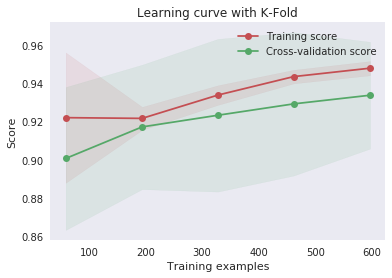

In [76]:
plot_learning_curve(model, "Learning curve with K-Fold", x, y, cv=cv)

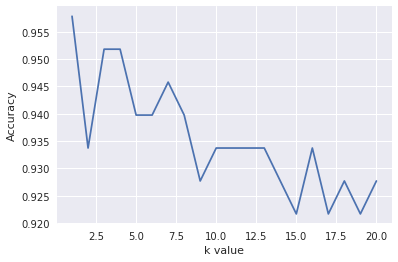

In [77]:
#Tuning del algoritmo
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [78]:
#Se entrena el modelo haciendo uso del algoritmo Knn
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
expected = y_test
# Se mide la precisión del algoritmo
metrics.accuracy_score(expected, predicted)

0.95180722891566261

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

max_depth=3
random_state=1

# Se crea el modelo usando decision tree  con max_depth=3 y random_state=1
model = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Se estandarizan los valores de entrenamiento y prueba y se entrena el modelo
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model.fit(x_train, y_train)

predicted = model.predict(x_test)
expected = y_test
metrics.accuracy_score(expected, predicted)

1.0

In [82]:
#  Matiz de Confusión 
print(metrics.confusion_matrix(expected, predicted))

[[106   0]
 [  0  60]]


In [83]:
# Se realiza la validación cruzada con 5 folds
cv = KFold(x.shape[0], n_folds=5, shuffle=False, random_state=33)
scores = cross_val_score(model, x, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

('Scores in every iteration', array([ 1.,  1.,  1.,  1.,  1.]))
Accuracy: 1.00 (+/- 0.00)


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

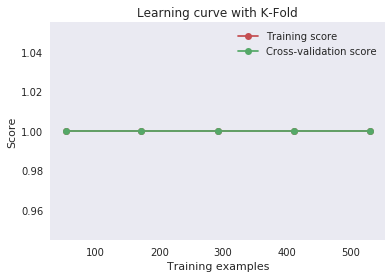

In [85]:
plot_learning_curve(model, "Learning curve with K-Fold", x, y, cv=cv)

In [87]:
from sklearn.metrics import classification_report

# Conjunto de parámetros a probar
tuned_parameters = [{'max_depth': np.arange(3, 10),
                     'criterion': ['gini', 'entropy'], 
                     'splitter': ['best', 'random'],
                     'class_weight':['balanced', None],
                     'max_leaf_nodes': [None, 5, 10, 20]
                    }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10, scoring='%s_weighted' % score)
    gs.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in gs.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision
()
Best parameters set found on development set:
()
{'splitter': 'best', 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
()
Grid scores on development set:
()
1.000 (+/-0.000) for {'splitter': 'best', 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
0.942 (+/-0.070) for {'splitter': 'random', 'max_leaf_nodes': None, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
1.000 (+/-0.000) for {'splitter': 'best', 'max_leaf_nodes': 5, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
0.959 (+/-0.050) for {'splitter': 'random', 'max_leaf_nodes': 5, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
1.000 (+/-0.000) for {'splitter': 'best', 'max_leaf_nodes': 10, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
0.950 (+/-0.061) for {'splitter': 'random', 'max_leaf_nodes': 10, 'criterion': 'gini', 'max_depth': 3, 'class

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
        ('scaler', StandardScaler()),
        ('ds', DecisionTreeClassifier(class_weight= 'balanced', criterion= 'gini', max_depth= 3, max_leaf_nodes= None, splitter='best'))
])

# Fit the model
model.fit(x_train, y_train) 

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(x.shape[0], 10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x, y, cv=cv)
print("Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

('Scores in every iteration', array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]))
Accuracy: 1.00 (+/- 0.00)


In [90]:
# Reporte de clasificación
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       106
          1       1.00      1.00      1.00        60

avg / total       1.00      1.00      1.00       166



<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

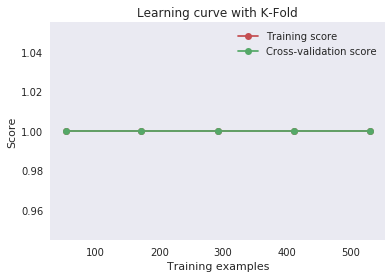

In [86]:
plot_learning_curve(model, "Learning curve with K-Fold", x, y, cv=cv)